<div style="border:solid green 2px; padding: 20px">
<b>Виктория, привет!</b>

Меня зовут Евгений Дащенко, и я буду проверять твой проект. Предлагаю общаться на «ты» 😊 Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

<h1>Прогноз вероятности оттока клиентов фитнес-клуба</h1>

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.


*Цели работы:* 
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

*В ходе работы мы:*
- проведем исследовательский анализ данных (EDA),
- построим модель прогнозирования оттока клиентов,
- кластеризируем клиентов,
- сформулируем выводы и сделаем базовые рекомендации по работе с клиентами.

Работать будем с выгрузкой данных /datasets/gym_churn.csv'.


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Здорово, когда есть вступление в сам проект, каждый сможет быстрее разобраться с тем о чем сам проект. 

</div>

**Буду благодарна за любую критику, предложения по улучшению проекта!**

----------------------------------------------

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Договорились 😊


</div>

Подгружаем библиотеки.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

<h2>Шаг 1. Загрузите данные</h2>

In [11]:
df = pd.read_csv('/datasets/gym_churn.csv')

In [12]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Приведем столбцы к нижнему регистру.

In [13]:
df.columns = df.columns.str.lower()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Это наши удобства 😊👍 
</div>

<h2>Шаг 2. Проведите исследовательский анализ данных (EDA)</h2>
<h4>Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe())</h4>


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


Пустых значений нет.

In [15]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Анализируя средние по общей выборке видим, что:
- половой состав примерно одинаковый, мужчин чуть больше (если gender = 1 - это мужчины, не нашла чтобы это было уточнено в ТЗ);
- 84 % посетителей живут вблизи от клуба;
- почти половина клиентов - сотрудники компании-партнёра клуба (48%);
- 30% клинтов пришли по акции "Приведи друга";
- средний возраст посетителей - 29 лет;
- средний абонемент по клубу длится 4,7 месяца;
- меньше половины посетителей посещали групповые занятия - 41%;
- в среднем по абонементу клиенты посещают клуб 1,87 раз в неделю;
- средний доход от дополнительных услуг - 147 у.е. (медианный 136);
- 26 % выборки не посещали клуб в текущем месяце.






<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Кстати для удобства изучения таблицы мы можем транспонировать расчеты `data.describe().T`    
</div>


<h4>Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby()) </h4>

In [16]:
churn_mean = df.groupby('churn').mean()
churn_mean

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


После группировки по признаку оттока видим, что:
- доля живущих поблизости среди ушедших в отток ниже (76%);
- доля партнерских клиентов ниже (35% vs 53%);
- доля приглашенных друзьями ниже (18% vs 35%);
- доля посещения групповушек ниже (26% vs 46%);
- средний возраст моложе (27 vs 30);
- средняя частота посещений в неделю ниже (1,47 vs 2.02).

<h4>Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток) </h4>


Транспонируем таблицу с признаками и оттоком и построем гистограммы.

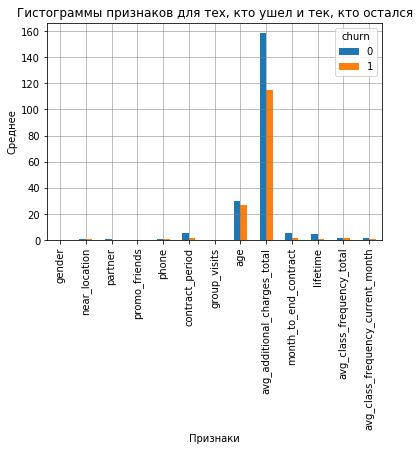

In [17]:
ax = df.groupby('churn').mean().T
ax.plot(kind='bar')
plt.ylabel('Среднее')
plt.xlabel('Признаки')
plt.grid(True, color='grey', linewidth=0.5)
plt.title('Гистограммы признаков для тех, кто ушел и тек, кто остался');

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Удачный способ применения транспонирования 😊 
</div>

По гистограммам видим, что наибольшя количественная разница в среднем наблюдается у признака 'Avg_additional_charges_total' - число дополнительных трат. В остальных признаках разница визуально не такая сильная, но она есть.

Построим бокслоты с распределениями, исключив признаки с параметрами 0 и 1.

In [18]:
for col in df.drop(['gender','near_location','partner','promo_friends','phone','group_visits'], axis = 1).columns:
    if col != 'churn':
        fig = px.box(df, x="churn", y=col, color="churn")
        fig.update_layout(title_text="Распределения по признакам и оттоку",
                              width = 500,
                              height = 300,
                              xaxis_title_text='Отток',
                              font_size=12)
        fig.show()

Интересный момент наблюдается в призаке Month_to_end_contract. Как будто клиенты, попавшие в отток попадают туда за месяц до окнчания абонемента.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Отличный способ визуализации, в том числе можно было бы построить наши графики с помощью метода `subplots`, например в 2 колонки, для нашего удоства в их изучении.
    
Тут можно посмотреть примеры. 
    
- `matplotlib`: https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html
- `plotly` : https://plotly.com/python/subplots/
    

</div>

<h4>Постройте матрицу корреляций и отобразите её</h4>

In [19]:
cm = df.corr()  

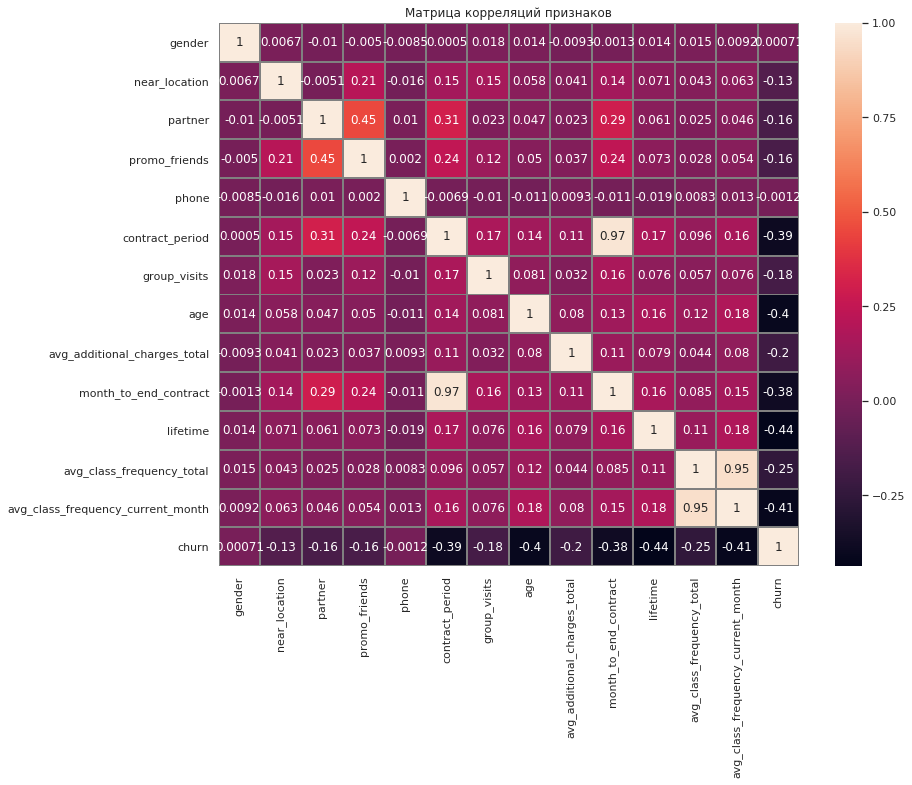

In [20]:
#нарисуем тепловую карту
sns.set(style='white')
plt.figure(figsize=(13, 10))
plt.title('Матрица корреляций признаков')
sns.heatmap(cm, annot = True, fmt='.2g', linewidths=1, linecolor='gray');

Сильная корреляция наблюдается лишь между признаками длина абонемента и месяцев до окончания абонемента, что вполне логично.

По оттоку во всех призаках видим обратную корреляцию. Слабая корреляция 0,39 - 0,44 есть с признаками длина абонемента, возраст, месяцев до окончания, время с момента первого обращения в фитнес-центр, среднее число посещений в месяц.

Таким образом в ходе исследовательского анализа данных мы проанализировали признаки, влияющие на отток, рассмотрели корреляцию между ними и выявили первичные закономерности..

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

У нас есть сильная корреляция между несколькими переменными (светлый квадрат на графике) и это говорит о мультиколлениарности.
    
Лучше всего избавляться от одной из таких переменных, чтобы наша модель работала объективно.
    
</div>

<h2>Шаг 3. Постройте модель прогнозирования оттока клиентов</h2>


Постройте модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:

<h4>Разбейте данные на обучающую и валидационную выборку функцией train_test_split().</h4>


Разделим наши данные на признаки (матрица X) и целевую переменную (y).

Также понизим размерность модели, исключив признаки, которые наименее коррелируют с целевой переменной: пол и телефон.

In [21]:
X = df.drop(['churn','gender','phone'], axis = 1)
y = df['churn']

# разделим модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

    
В целом выборка разделена верно.
    
Я бы рекомендовал бы ещё использовать атрибут `stratify` для целевой переменной. Он дает нам безопасность сохранения 20% значений равного нужного нам количества классов в целевой переменной.
    
</div>

<h4>Обучите модель на train-выборке двумя способами:
логистической регрессией,
случайным лесом.</h4>


In [22]:
# стандартизируем данные методом StandartScaler
scaler = StandardScaler()
scaler.fit(X_train)
# преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Хорошо, что масштабируем наши данные. Так модель в большинстве случаев работает лучше, но это не всегда и нужно проверять.
    
    
</div>

In [23]:
# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression()
# обучим модель
lr_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [24]:
rf_model = RandomForestClassifier(n_estimators = 100,random_state = 0) # Ваш код здесь
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

<h4>Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик? Не забудьте указать параметр random_state при разделении выборки и задании алгоритма.</h4>


In [25]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Отличная функция для расчета наших метрик 👍
    
</div>

In [26]:
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Метрики для модели логистической регрессии:')
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')

Метрики для модели логистической регрессии:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.86
	Recall: 0.83


На основании метрик видим, что модели очень схожи. С минимальным отрывом по показателю precision (точность) в бинарной классификации побеждает модель случайного леса.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>
   
Обрати внимание, что все рассчитанные метрики по отдельности сложны в интерпритации, хотелось чтобы одна метрика включала в себя самые ключевые параметры. Есть метрика `F1`, которая как раз включает в себя основные параметры точности и полноты. 
    
В том числе рекомендую смотреть на метрику `ROC–AUC`. 
    
    
Ниже статья, в которой есть материалы про метрики и как их визуализировать.
    
https://habr.com/ru/company/ods/blog/328372/
    
---

В том числе можно было попробовать и сравнить параметр `C` у логистической регрессии. У случайного леса количество деревьев (`n_estimators`) и максимальную глубину дерева (`max_depth`), чтобы осуществить поиск лучшей модели.
    
---
    
Кстати для автоматического перебора гиперпараметров мы можем использовать готовый метод `GreadSearchCV` в библиотеке `sklearn`. 
    
</div>

<h2>Шаг 4. Сделайте кластеризацию клиентов</h2>

Отложите в сторону столбец с оттоком и проведите кластеризацию объектов (клиентов):

<h4>Стандартизируйте данные.</h4>

In [27]:
X = df.drop(['churn'], axis = 1)
y = df['churn']

# разделим модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>
   
Желательно использовать один и тот же датафрейм, который мы используем для обучения и поиска кластеров, чтобы сохранять единую логику данных.
    
    
</div>

In [28]:
# стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(X) 

<h4>Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.</h4>

In [29]:
linked = linkage(x_sc, method = 'ward')
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Дендограмма для кластеризации клиентов фитнес-клуба')
plt.show()

KeyboardInterrupt: 

На основании дендограмм предположим, что оптимальное число кластеров - 4-5.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>
    
Отлично 👍

В том числе чтобы определить количество кластеров можно использовать метод локтя. 
    
Ниже статья с двумя методами, которые можно в том числе использовать для определения количества кластеров.
    
https://habr.com/ru/company/jetinfosystems/blog/467745/
    
</div>

<h4>Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).</h4>

In [31]:
km = KMeans(n_clusters = 5) # задаём число кластеров, равное 5
labels = km.fit_predict(x_sc) # применяем алгоритм к данным и формируем вектор кластеров 

# сохраняем метки кластера в поле нашего датасета
df['cluster'] = labels

<h4>Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?</h4>

In [32]:
# выводим статистику по средним значениям наших признаков по кластеру
df.groupby(['cluster']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
1,0.564516,0.849078,0.279954,0.071429,1.0,2.670507,0.450461,30.033410,161.130058,2.470046,4.844470,2.797107,2.789023,0.081797
2,0.493590,0.948718,0.814103,0.998397,1.0,3.022436,0.435897,29.067308,141.294953,2.831731,3.705128,1.706810,1.598757,0.261218
3,0.484051,0.722488,0.295853,0.011164,1.0,1.922648,0.275917,28.129187,129.367977,1.829346,2.209729,1.252302,0.999867,0.562201
4,0.500000,0.936636,0.740783,0.480415,1.0,11.827189,0.547235,29.892857,163.426463,10.785714,4.711982,2.001185,1.993578,0.021889


- Второй кластер лидер по приглашенным друзьям. 
- Возраст между кластерами отличается минимально.
- Второй кластер - лидер по длительности абонемента.

Построим распределения.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>
    
Супер, теперь у нас есть портреты наших пользователей 😊
    
</div>

<h4>Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?</h4>

In [33]:
df2 = df.groupby(['cluster']).mean().round(2).reset_index()
for col in df2.columns:
    if col != 'cluster':
        fig = px.bar(df2, x='cluster', y=col, text=col)
        fig.update_layout(
            title='Распределения среднего значения признака {} по кластерам'.format(col),
            width = 800, height = 300,
            xaxis_title_text='кластер',
            font_size=12 )
        fig.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>
    
Очень хороший тон подписывать значения наших данных на графике, ведь так быстрее понять конкретику.
    
</div>

Дополнительно отметим:
- в первый кластер не попали клиенты, живущие по близости.
- клиенты первого кластера реже всех посещают групповые занятия.
- клиенты вторго и третьего кластера тратят в клубе чуть больше, чем остальные.
- клиенты третьего кластера посещают клуб в неделю и месяц чаще всех - 2,8 раз.

<h4>Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?</h4>

In [24]:
df.groupby(['cluster'])['churn'].mean()

cluster
0    0.523114
1    0.071013
2    0.440945
3    0.027613
4    0.266839
Name: churn, dtype: float64

Первый и четвертый кластеры - явные лидеры по оттоку. Второй и третий - самые лояльные клубу люди.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>
    
Думаю, теперь у коллег из маркетинга будет много дополнительной информации, которую они смогут использовать при разработке дополнительных мероприятий по сокращению оттока.
</div>

<h2>Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами</h2>

<h5>Выделим целевые группы клиентов</h5>

Наиболее лояльные клиенты:
- лица, посещающие группоаве занятия;
- лица, живущие поблизости;
- лица, приглашенные друзьями и по партнерским программам.

<h5>Предложим меры по снижению оттока</h5>

- стимулировать посещение групповых занятий;
- проводить  специализированные маркетинговые акции в ближайших к клубу районах;
- прводить акции со стимулированием покупки более длительных абонементов;
- устраивать соревнованиям между группами друзей и организациями-партнерами по посещаемости, награждать топ-3 самых посещающих мелкими сувенирами.


<h5>Определить другие особенности взаимодействия с клиентами</h5>

- люди, у которых абонемент заказнчивается через 1-2 месяца попадабт в отток чаще, нужно уделить им внимание.
- предлагается расширить ассортимент околоспортивных товаров, предлагаемых к покупке в клубе, делая посещение клуба более удобным для клиентов.
- провести опросы среди клиентов с целью улучшения качества оказания услуг фитнес-центром. Отдельный опрос провести с лицами, попавшими в отток.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>
    


Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
       
В целом сам проект выполнен на хорошем уровне! На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас. Было использовано большое количество методов, которые будут помогать тебе в дальнейших проектах.
        
Поздравляю с успешным завершением проекта 😊👍
    
И желаю успехов в новых работах 😊
    
    
Если вдруг будет дополнительный интерес по осовоению дополнительных материалов этой темы, вот достаточно неплохая информация по базовым алгоритмам:
    
https://compscicenter.ru/courses/data-mining-python/2018-spring/classes/
    
P.s. Там несколько курсов, по которым можно будет пройтись при желании 😊

    
</div>